<a href="https://colab.research.google.com/github/szeshiang/Deep-Learning/blob/main/25_Feb_24_Fashion_Mnist_Assignment_Func_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the dataset
from tensorflow.keras.datasets import fashion_mnist
print('Data loaded')

Data loaded


In [2]:
# create train & test
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
# normalize the pixel in 0 to 1
X_train=X_train/255.
X_test=X_test/255.

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

In [7]:
# functional API
def build_model_function():
  input_layer=Input(shape=(28,28))
  flatten_layer=Flatten()(input_layer)
  first_dense=Dense(128,activation='relu')(flatten_layer)
  output_layer=Dense(10,activation='softmax')(first_dense)
  func_model=Model(inputs=input_layer,outputs=output_layer)
  return func_model

In [8]:
model=build_model_function()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model is compiled')

model is compiled


In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop=EarlyStopping(monitor='val_loss',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,
                         patience=10
                         )

epochs=150

In [19]:
history=model.fit(X_train,y_train,
                  batch_size=128,
                  epochs=epochs,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop]
                  )

Epoch 1/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9902 - val_loss: 0.9938 - val_accuracy: 0.8819
Epoch 2/150
469/469 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.9492 - val_accuracy: 0.8881
Epoch 3/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.9462 - val_accuracy: 0.8839
Epoch 4/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.9156 - val_accuracy: 0.8865
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 0.9096 - val_accuracy: 0.8866
Epoch 6/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.9414 - val_accuracy: 0.8841
Epoch 7/150
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9932 - val_loss: 0.9598 - val_accuracy: 0.8875

In [20]:
score_test=model.evaluate(X_test,y_test)
print('test score',score_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0012 - accuracy: 0.8793
test score [1.0011916160583496, 0.8792999982833862]


In [21]:
score_test=model.evaluate(X_train,y_train)
print('test score',score_test)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9827
test score [0.04900947958230972, 0.982699990272522]


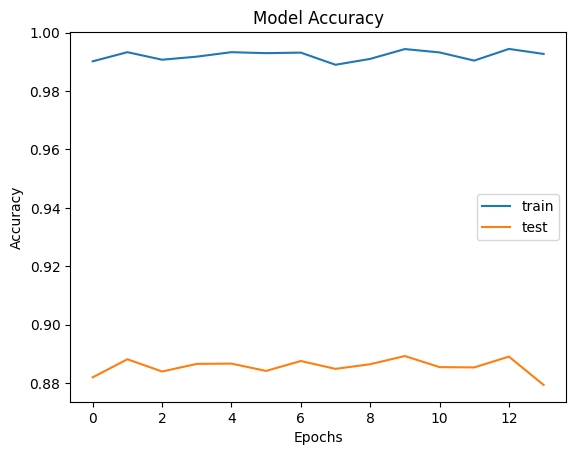

In [23]:
# plot the graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()